# Istio / Proxy  Case Study

This is a Reagent Analytics project demo, using the API, to answer questions about foreign influence in various entities in the Harbor open source project.

The `reagentpy` Python package facilitates use of the [Reagent API](https://api.reagentanalytics.com) and querying the Reagent version control intelligence database.

## Import the `Reagent` object

Set all required variable names to appropriately constrain query results.

In [1]:
from reagentpy import Reagent

repo_name = "istio/proxy"
limit = 50
china_tz = 8.0

# Non-Adversarial Threat

There are a number of human factors that influence the likelihood that vulnerabilities are injected into repositories at various points in the open source lifecycle.  These can be used to infer threat that can be quantified, and thus analyzed.  These metrics are all on a sliding scale between from **0 - 10**, 0 meaning that Harbor is unaffected by this issue, and 10 meaning that that all commits exhibit the problem at hand.

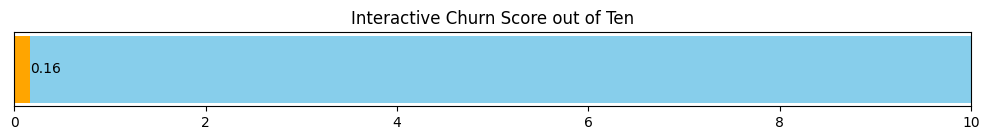

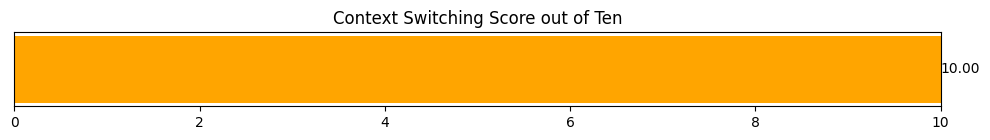

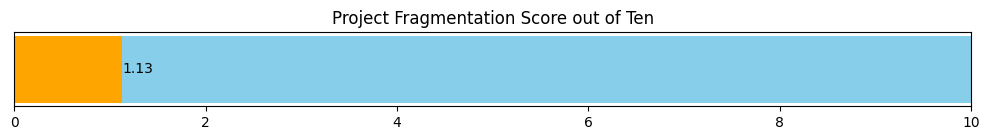

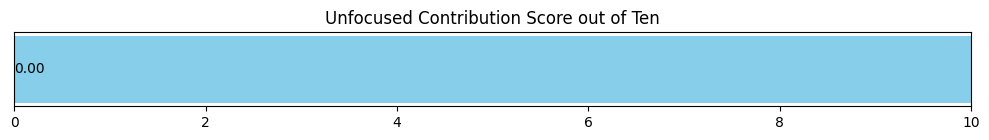

In [2]:
Reagent().demo_visualizations().create_out_of_ten_chart(repo_name)

## Threatscoring Breakdown

**Project Fragmentation** is defined as the ratio of files within a repository edited by more than ten developers to files within a repository edited by less than ten developers.  The significance factor for this function is **r = 16**.

**Unfocused Contribution** is measured by taking the average pagerank of each file within a repo.  The significance factor for this function is **r = .4497**.

**Context Switching** is calculated by taking the average weekly density of distinct file communities users commit to each week.  The significance factor for this function is **r = 0.17**.

**Interactive Churn** is the average weekly number of user interactions a file has, scaled by how recent each action is.  The significance factor for this function is **r = 0.16**.

In [3]:
Reagent().enrichments().threat_score(repo_name).df()

,interactive_churn_score,context_switching_score,project_fragmentation_score,unfocused_contribution_score
0,0.16,10,1.126843,0


## What organizations are involved?  What are the affiliations of those organizations?

Analyzing email domains found in the repo yeilds a glimpse into the organizations who are interested in using Harbor.

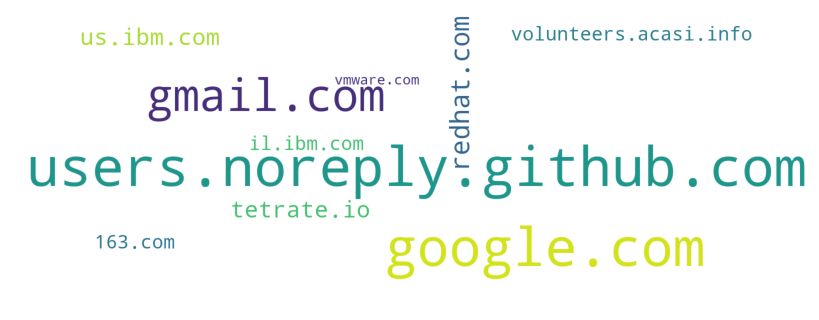

In [4]:
Reagent().demo_visualizations().wordcloud(repo_name)

In [5]:
Reagent().repo().email_domains(repo_name, limit).df()

,repo_name,domain,instances,timezones
0,istio/proxy,users.noreply.github.com,39,"[-7.0, -8.0, -6.0, 3.0, 2.0, 8.0, -5.0, -4.0, 1.0]"
1,istio/proxy,google.com,38,"[-7.0, -8.0]"
2,istio/proxy,gmail.com,25,"[-8.0, -6.0, -7.0, 8.0, 9.0, 2.0, -0.0, -5.0]"
3,istio/proxy,redhat.com,4,"[-4.0, 5.5, -7.0]"
4,istio/proxy,us.ibm.com,3,"[-6.0, 3.0]"
5,istio/proxy,tetrate.io,3,"[-0.0, 9.0, 7.0]"
6,istio/proxy,163.com,2,[8.0]
7,istio/proxy,volunteers.acasi.info,2,"[-6.0, -7.0]"
8,istio/proxy,il.ibm.com,2,[3.0]
9,istio/proxy,github.com,1,[-7.0]


## Repository Health

Here are some indications of whether or not an open source repository is well-maintained, and is following the most basic security guidelines set by GitHub.

This endpoint is not currently available, but we anticipate that it will be ready shortly.

In [6]:
Reagent().demo_visualizations().print_hygiene_summary(repo_name)

Repository Overview: istio/proxy
Description: The Istio proxy components.
Total Contributors: 133, spanning across 14 timezones, indicating a global contribution pattern.
Fork Count: 1182, showcasing immense community engagement and interest.
License Presence: Present, an necessary aspect of open source contribution.
Readme Presence: Present, vital for repository documentation.
Recent Activity: The repository was last active on 2022-02-22, indicating a stale status.


In [7]:
Reagent().repo().hygiene_summary(repo_name).df()

,description,forks,has_license,repo_name,has_readme,timezones,total_contributors,total_timezones,last_activity_at
0,The Istio proxy components.,1182,True,istio/proxy,True,"[-7.0, -8.0, -0.0, -5.0, -4.0, 3.0, 8.0, -6.0, 9.0, 1.0, -3.0, 5.5, 2.0, 7.0]",133,14,2022-02-22


# Adversarial Risk

Describes deliberate attacks by bad actors with intent, capability, and targeting characteristics of any scale.  While all kinds of risk are invaluable in deciding how "safe" a resource is to use, adversarial risk serves as the best way to quantify sources of attack.

### Timezones

Often, one can deduce national origin by simply looking at timezones.  This is helpful when analyzing entities that aren't large or old enough to have country data associated with it.  Here's the breakdown for this repo according to timezones.

Reading timezone geo data...
  Reading timezones from combined-now.json...  Finished in 2.99 seconds.
Plotting timezone map...


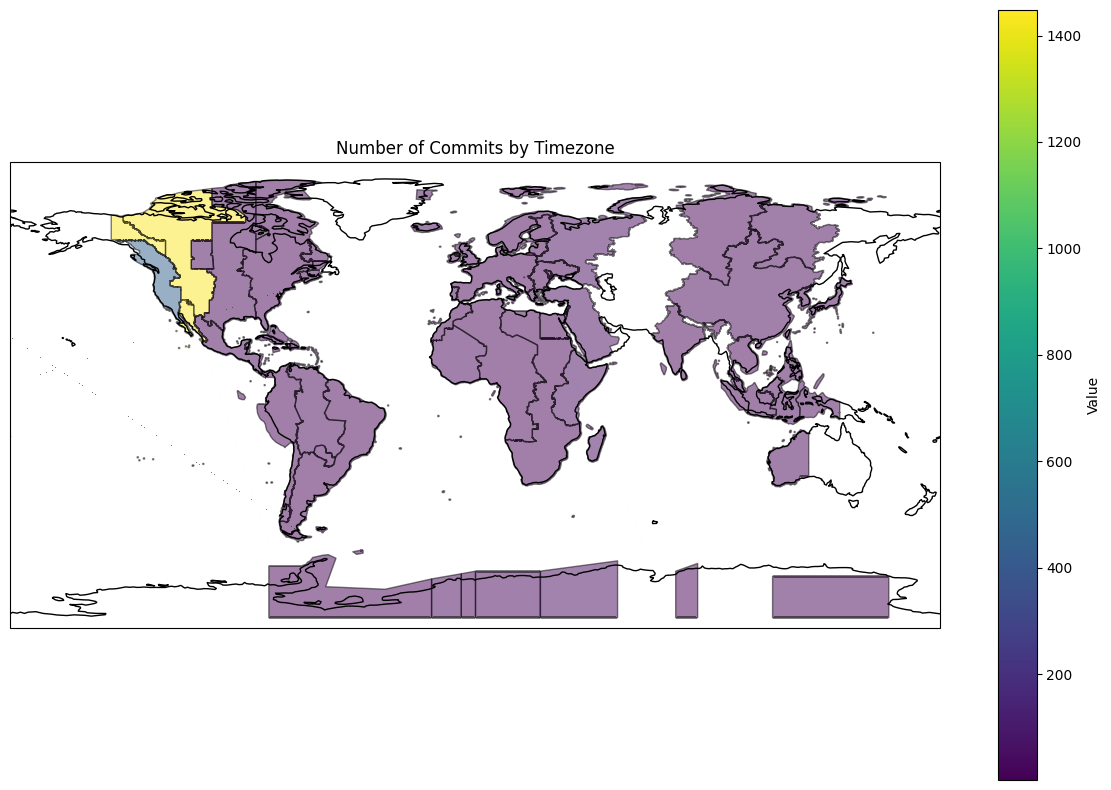

In [8]:
Reagent().timezone_visualizations().build_and_show_timezone_map(repo_name)

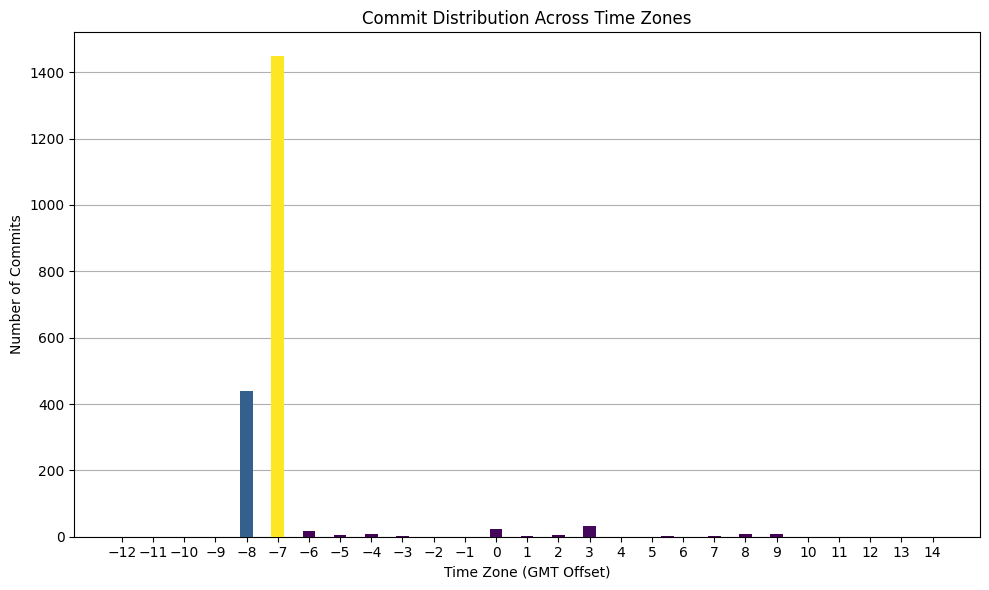

In [9]:
Reagent().timezone_visualizations().plot_timezone_distribution_color(repo_name)

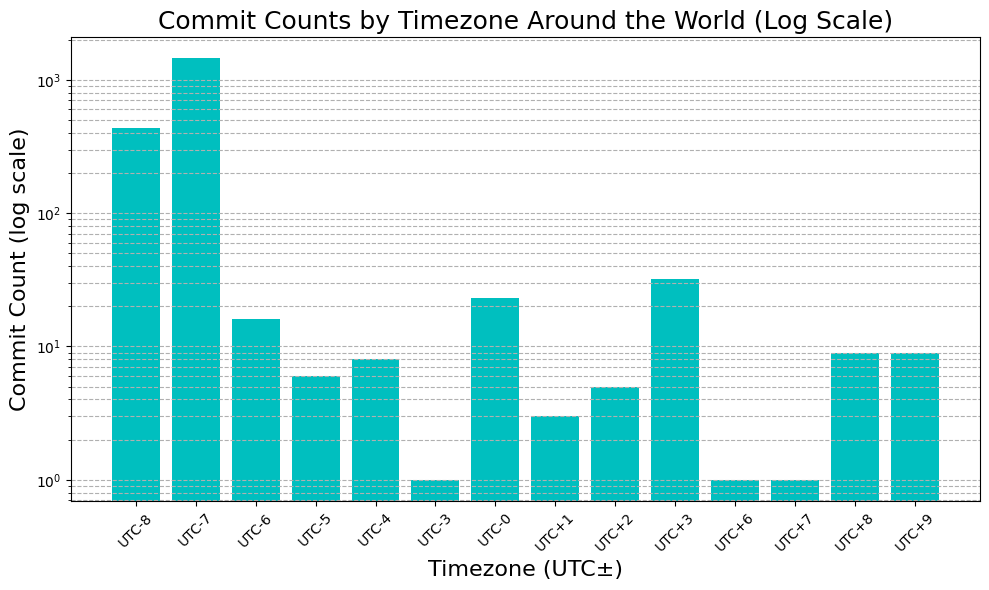

In [10]:
Reagent().timezone_visualizations().show_logarithmic_bar_chart(repo_name)

## Identity Verification

One prime indicator of adversarial intent is the deliberate concealment of identity.  We have several methods to detect this in users.

### Timezone Manipulation

Manipulating where you seem to be from is an indication of open source malpractice - specifically, manipulating your location incorrectly.  We can find instances of "teleportation" in our database by finding commits from different timezones impossibly close together in time.

In [11]:
Reagent().enrichments().timezone_spoof(repo_name).df()

,spoof_score,tz_1,tz_2,email,url_1,url_2,commit_1_date._Date__ordinal,commit_1_date._Date__year,commit_1_date._Date__month,commit_1_date._Date__day,commit_2_date._Date__ordinal,commit_2_date._Date__year,commit_2_date._Date__month,commit_2_date._Date__day
0,21.0,13.0,-8.0,daniel@centurion.net.nz,https://github.com/torvalds/linux/commit/ad0327d680734b76c33f5438cd656bdfd26f5f5b,https://github.com/torvalds/linux/commit/d5ec1686ba96eb75e132196c486cc0521b00f12c,732626,2006,11,11,732629,2006,11,14
1,20.0,10.0,-10.0,smashery@gmail.com,github.com/K3ysTr0K3R/metasploit-framework/commit/96046f9aec9e5c1a72415f7d01dde2e726168c3a,github.com/K3ysTr0K3R/metasploit-framework/commit/96feb8d1befb45752b780c088d707d2312381c15,738329,2022,6,23,738329,2022,6,23
2,20.0,-3.0,9.0,hmh@hmh.eng.br,https://github.com/torvalds/linux/commit/f432255e936a892a6896e5032e2b4897423076f2,https://github.com/torvalds/linux/commit/bc57f865fa2282ad2b7efe02da0a752e602e982e,732876,2007,7,19,732876,2007,7,19
3,20.0,-10.0,10.0,eschweiss@gmail.com,github.com/K3ysTr0K3R/metasploit-framework/commit/a89e88c462abb42fb5074a769648d79100b05955,github.com/K3ysTr0K3R/metasploit-framework/commit/4f650e7c93e1d1652a8365f1b9b0b450b77e2848,738333,2022,6,27,738333,2022,6,27
4,19.0,11.0,-8.0,paulus@samba.org,https://github.com/torvalds/linux/commit/fb6d73d3014babb69f5cc2d1d78b31e9d09fc5df,https://github.com/torvalds/linux/commit/f6ff56cd56b83d8edf4b3cffc5c53c56b37a5081,732266,2005,11,16,732266,2005,11,16
5,19.0,11.0,-8.0,anton@samba.org,https://github.com/torvalds/linux/commit/570142ca37248291c03df9852a5a0ce97f756464,https://github.com/torvalds/linux/commit/0286486783a75ef991df3ee250917efb55df75b3,732257,2005,11,7,732257,2005,11,7
6,19.0,11.0,-8.0,herbert@gondor.apana.org.au,https://github.com/torvalds/linux/commit/6151b31c9616d71f714fc7ef8e2306f67f3b94c3,https://github.com/torvalds/linux/commit/6df716340da3a6fdd33d73d7ed4c6f7590ca1c42,732253,2005,11,3,732254,2005,11,4
7,19.0,-3.0,8.0,magallania@gmail.com,github.com/haoheliu/2021-ISMIR-MSS-Challenge-CWS-PResUNet/commit/8764fe78d67448e33d489c6861f0c1ab35f67146,github.com/haoheliu/2021-ISMIR-MSS-Challenge-CWS-PResUNet/commit/5bf8dbbef163749e694593d221d52a2162a01c0c,738080,2021,10,17,738081,2021,10,18
8,19.0,-8.0,11.0,shemminger@osdl.org,https://github.com/torvalds/linux/commit/eb229c4cdc3389682cda20adb015ba767950a220,https://github.com/torvalds/linux/commit/6151b31c9616d71f714fc7ef8e2306f67f3b94c3,732253,2005,11,3,732253,2005,11,3
9,19.0,-8.0,11.0,shemminger@osdl.org,https://github.com/torvalds/linux/commit/c2da8acaf488b8651edfb04ebf3ab089f3a7830f,https://github.com/torvalds/linux/commit/c75d721c761ad0f2d8725c40af9e4f376efefd24,732252,2005,11,2,732252,2005,11,2


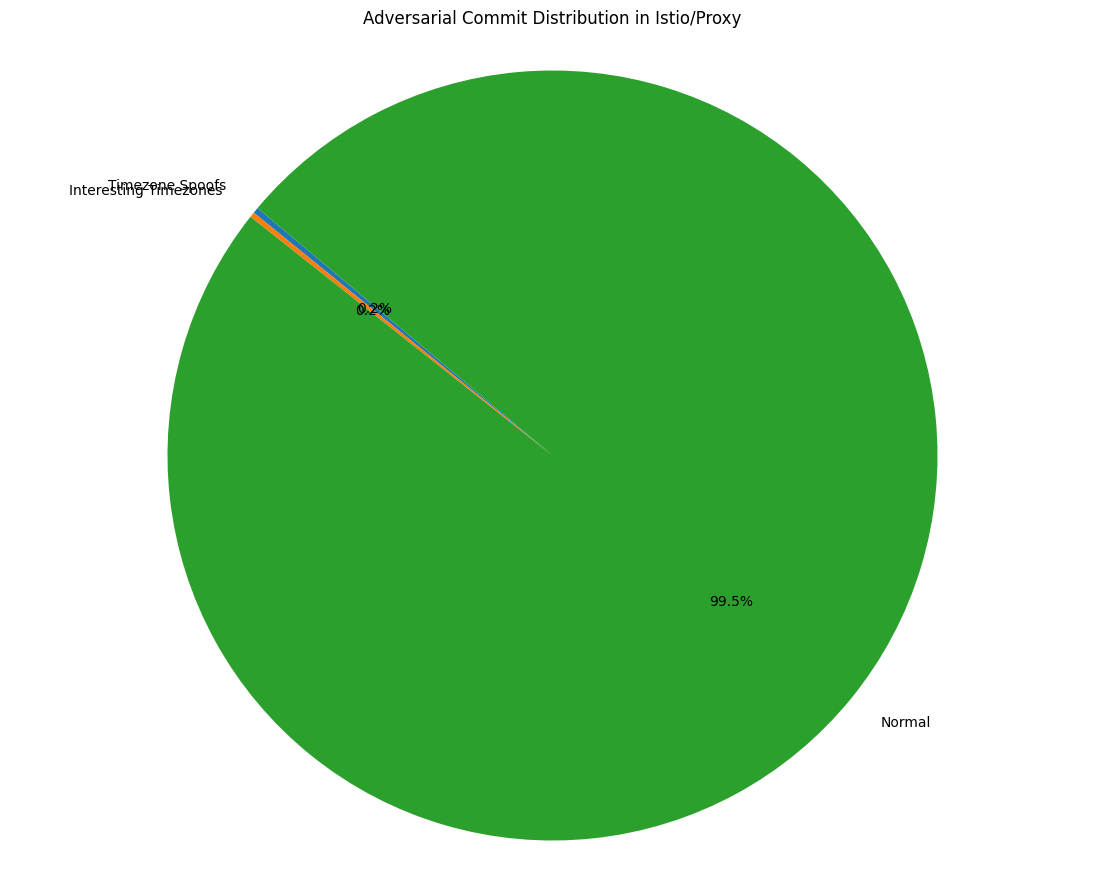

In [12]:
Reagent().demo_visualizations().adversarial_pie_chart(repo_name)